In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [30]:
df_naver = pd.read_csv("./data/naver_stock_clear.csv", engine='python', parse_dates=["date"],index_col=0).set_index('date')
df_naver.head()

,close_val,change_val,open_val,high_val,low_val,acc_quant,change_rate
date,,,,,,,
2015-12-28,641000.0,-6000.0,647000.0,650000.0,638000.0,47511.0,-0.936037
2015-12-29,642000.0,1000.0,649000.0,649000.0,631000.0,50648.0,0.155763
2015-12-30,658000.0,16000.0,642000.0,668000.0,639000.0,64215.0,2.431611
2016-01-04,632000.0,-26000.0,650000.0,658000.0,632000.0,93272.0,-4.113924
2016-01-05,637000.0,5000.0,633000.0,642000.0,631000.0,69456.0,0.784929


predicted=676769.422430, expected=680000.000000
predicted=679940.197256, expected=700000.000000
predicted=697941.600349, expected=707000.000000
predicted=706936.235993, expected=693000.000000
predicted=695588.068524, expected=676000.000000
predicted=678484.003069, expected=677000.000000
predicted=677328.754815, expected=692000.000000
predicted=690853.452336, expected=694000.000000
predicted=694411.397545, expected=698000.000000
predicted=698222.095576, expected=701000.000000
predicted=701367.029344, expected=688000.000000
predicted=690068.728454, expected=690000.000000
predicted=690336.735404, expected=694000.000000
predicted=694144.730778, expected=704000.000000
predicted=703572.426544, expected=703000.000000
predicted=703812.806509, expected=700000.000000
predicted=701000.599224, expected=710000.000000
predicted=709600.864494, expected=720000.000000
predicted=719752.265739, expected=687000.000000
predicted=691704.717306, expected=697000.000000
predicted=696247.109906, expected=707000

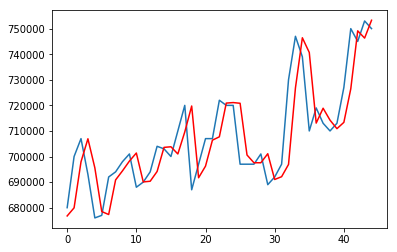

In [41]:
X = df_naver.loc[: '2016-7-10'].close_val
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
# test
plt.plot(test.values)
plt.plot(predictions, color='red')
# predictions
plt.show()

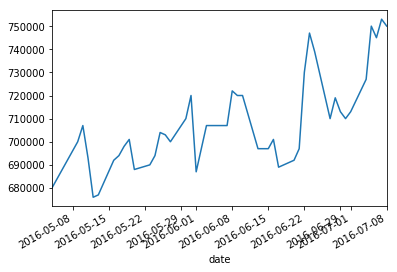

In [39]:
test.plot()